https://github.com/alerti/PLA-perceptron-learning-algorithm-/blob/master/PLA.ipynb

In [ ]:
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import Image

%precision 10
%matplotlib inline

# **Perceptron Learning Algorithm (not linearly separable)**



**Notes:**

1.   Datapoints were generated based on the weight function. 
2.   The points are linearly seperable. 
3.   The new testing weights are linearly seperable. 
4.   Weights are based on the datapoints distance from the activation function. 
5.   The activation function is simply a -x function.
6.   Number of runs was 10. 
7.   Max number of iterations was 1000.
8.   Misclassification error: 0% (datapoints were seperated by the weight function)



# Generating Data

I will generate some data along the data points $ X = (x_1, ... , x_d) $ with $d$ dimensions $[-1, 1] $.  The dataset will have $N$ as the number of datapoints. The target function $ f(x) $will be values from positive and negetive. 

**The Formula:**
$X$ and $W$ are the the inputs and weights respectively that are the two arrows in a d+1 dimensional space.  


$\displaystyle\sum_{i=0} ^{d+1} W . X$<div class="open_grepper_editor" title="Edit & Save To Grepper"></div>

general-diagram-of-perceptron-for-supervised-learning_4.avif

# **Generate the Datasets:**

> The numbers will be random from $[-1, 1] $



In [ ]:
d = 2 # dimensions
N = 50 # datapoints in the set of data
numberOfSets = 1 # number of sets

In [ ]:
numberOfPoints = N*numberOfSets
allDatasets = np.ones(shape=(numberOfPoints, 1+d)) # return array with ones
allDatasets[:, 1:] = np.random.uniform(low=-1, high=+1, size=(numberOfPoints, d))

# **Activation Function**

> The activation funtion will be based off of the weight vector. This will be the hyperplane $f(x_1,x_2) = x_1 + x_2$



In [ ]:
def weightTarget(d):
    w = np.ones(shape=1+d)
    w[0] = 0
    return w

In [ ]:
# target with array aligns with dimension
weightFunction = weightTarget(d=2)
weightFunction

array([0., 1., 1.])

In [ ]:
allLabels = np.sign(allDatasets@weightFunction.T)

In [ ]:
def dataGenerator(N, d, nmberOfSets):
    numberOfPoints = N*numberOfSets
    allDatasets = np.ones(shape=(numberOfPoints, 1+d)) # return array with ones
    allDatasets[:, 1:] = np.random.uniform(low=-1, high=+1, size=(numberOfPoints, d))
    weightFunction = weightTarget(d)
    #allLabels = np.sign(allDatasets@weightFunction.T)

    # give labels to datasets using the target function
    return {'Datasets':allDatasets,
            
            'Labels':allLabels, 

            'Datapoints per set': N,

            'Dimension': d,

            'Sets': nmberOfSets,

            'Data Generator': weightFunction} 

# select the set as the training set
def trainingGenerator(data, index=0):
    allDatasets, allLabels = data['Datasets'], data['Labels']
    N, nmberOfSets = data['Datapoints per set'], data['Sets']
    assert index < nmberOfSets, 'Not enough sets.'
    offset = N*index
    return allDatasets[offset:offset+N,:], allLabels[offset:offset+N]  

# **Create the Hyperplane**

> Input is coordinate i in the $X$ dataset



In [ ]:
DATA = dataGenerator(N=25, d=2, nmberOfSets=10)

In [ ]:
X, Y = trainingGenerator(data=DATA, index=1)

In [ ]:
def findCoordinates(i, X):
    _, dim = X.shape
    assert i < dim
    return X[:, i]

In [ ]:
def scatterData(X, Y, dimension1=1, dimension2=2):
    positives, negatives = X[Y==+1], X[Y==-1]
    
    pos_x, pos_y = findCoordinates(X=positives, i=dimension1), findCoordinates(X=positives, i=dimension2)
    neg_x, neg_y = findCoordinates(X=negatives, i=dimension1), findCoordinates(X=negatives, i=dimension2)

    plt.scatter(pos_x, pos_y, color='green')
    plt.scatter(neg_x, neg_y, color='red')

In [ ]:
def createHyperplane(w, dimension1=1, dimension2=2): # h means hyperpla
    w_0, w_1, w_2 = w[0], w[dimension1], w[dimension2]
    assert w_2 != 0
    return lambda x : (-1/w_2)*(w_1*x + w_0)


def drawHyperplane(w, dimension1=1, dimension2=2, color='blue'):
    #dim = len(w)
    #assert dimension1 < dim and dimension2 < dim
    h = createHyperplane(w=w, dimension1=dimension1, dimension2=dimension2)
    x = np.linspace(start=-1.0, stop=1.0, endpoint=True, num=50)
    plt.plot(x, h(x), color)

In [ ]:
def graphTrainingSet(X, Y):
    global weightFunction
    scatterData(X, Y, dimension1=1, dimension2=2)
    drawHyperplane(w=weightFunction)

In [ ]:
graphTrainingSet(X, Y)

IndexError: ignored

# **Enter in Learning Rate**

> The goal is to initiate the weight vector $w_0$ and repeat until until no more datapoints are missclassifed $X_n$ from the selected dataset. Then update the weight vector $W_n+1 = W_n+1 + y_nX_n$ and return the final weight vector as $W$. 



In [ ]:
def emptyPercep(array):
    return array.size == 0
    
def randomDatapoint(X, Y):
    nb_points, _ = X.shape
    index = np.random.randint(nb_points)
    return X[index], Y[index]



> Input the weight vector $W$ and the training set with the datapoitsn $X$ and lables $Y$. The output is the sample error E_in and matched_p are the matching results.  



In [ ]:
def match(w, X, Y):
    predicted_Y = np.sign(X@w.T)
    matched_p = (predicted_Y != Y)
    E_in = np.sum(matched_p)
    return matched_p, E_in

In [ ]:
def randomWeightVectors(X):
    _, dim = X.shape
    return np.random.uniform(low=-1, high=+1, size=dim)

In [ ]:
def PLA(X, Y, w_init, eta=1, max_iter=1000):
    N, dim = X.shape

    # array to store weights
    weights = np.zeros(shape=(max_iter, dim))
    E_in_evol = np.zeros(max_iter)
    
    w = np.copy(w_init)

    for n in np.arange(max_iter):
        matched_p, E_in = match(w, X, Y)
        misclassified_X, correct_Y = X[matched_p], Y[matched_p]
        weights[n, :], E_in_evol[n] = w, E_in

        if emptyPercep(misclassified_X):
            return {'Weights':weights, 'Counter':n, 'In_Sample Error':E_in_evol}
        else:
            misclassified_x, correct_y = randomDatapoint(misclassified_X, correct_Y)
            w = w + eta*correct_y*misclassified_x
    else:
        return {'Weights':weights, 'Counter':n, 'In_Sample Error':E_in_evol}

In [ ]:
PLA_Result = PLA(X, Y, w_init=randomWeightVectors(X), **{'max_iter':1000, 'eta':0.1})

In [ ]:
print(PLA_Result)

{'Weights': array([[-0.0732751484, -0.2665310454,  0.8061811484],
       [ 0.          ,  0.          ,  0.          ],
       [ 0.          ,  0.          ,  0.          ],
       ...,
       [ 0.          ,  0.          ,  0.          ],
       [ 0.          ,  0.          ,  0.          ],
       [ 0.          ,  0.          ,  0.          ]]), 'Counter': 0, 'In_Sample Error': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.


> Get the final weights and get iterations



In [ ]:
def finalWeights(traces, nb_iters):
    return [trace[last] for trace, last in zip(traces, nb_iters)]


def adjustWeights(X, Y, learning_alg, nb_runs=10, **params):
    _, dim = X.shape
    traces, nb_iters = [], []
    for i in range(nb_runs):
        result = PLA(X, Y, w_init=randomWeightVectors(X), **params)
        traces.append(result['Weights']), nb_iters.append(result['Counter'])
    return finalWeights(traces, nb_iters), nb_iters

In [ ]:
FINAL_WEIGHTS, ITERATIONS = adjustWeights(X, Y, learning_alg=PLA, 
                                nb_runs=10, **{'max_iter':1000, 'eta':0.01})

In [ ]:
FINAL_WEIGHTS

[array([ 0.68638052  , -0.8536386697,  0.9362858174]),
 array([ 0.8010714702,  0.9950576744, -0.5423934087]),
 array([ 0.4990915823, -0.9612018514, -0.9580646744]),
 array([ 0.9824677179, -0.4761077731, -0.0704423404]),
 array([ 0.8205565805, -0.9751952567,  0.3964305127]),
 array([ 0.680586736 , -0.5723494063, -0.0432947274]),
 array([ 0.2988422675, -0.8758799452,  0.9309629399]),
 array([ 0.9435413664, -0.7270966006, -0.1899003018]),
 array([-0.7118672928, -0.3617631562, -0.5805054314]),
 array([0.799139646 , 0.2088461264, 0.240965576 ])]

In [ ]:
ITERATIONS

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



> Visualize the original hyperplane with the adjusted hyperplanes



In [ ]:
def plotNewWeights(X, Y, weightFunction, weights):
    fig, ax = plt.subplots()
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    scatterData(X, Y)
    drawHyperplane(w=weightFunction)
    for w_final in weights:
        drawHyperplane(w=w_final, color='brown')

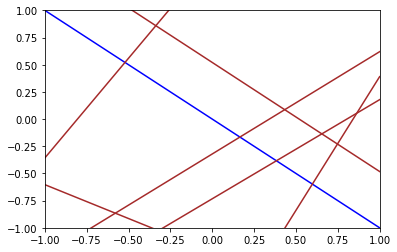

In [ ]:
plotNewWeights(X,Y, weightFunction=weightFunction, weights=FINAL_WEIGHTS)